In [1]:

import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk
import time
from copy import deepcopy
import mido


from synt.function import *
from synt.const import *
from synt.synt import *
from synt.osc import *

from synt.envolv import *
from synt.effects import *
from synt.instrumento import *
from synt.mixer import *
from synt.midisequencer import *

import os
import librosa

In [2]:
'''MOSTAR ONDAS COPIANDOLAS PARA QUE NO SE ALTERE EL FRAME'''
from copy import deepcopy
def showOsc(osc, time, chunks=False):
    _osc = deepcopy(osc)
    signal = np.zeros(0)
    _chunks = int(time*(SRATE+CHUNK)/CHUNK)
    if chunks:
        _chunks = time
    for i in range(_chunks):
        signal = np.concatenate((signal, _osc.next()))
    plt.plot(signal)

In [3]:
'''REPRODUCTOR'''
input = None

def callback(outdata, frames, time, status):
    global input
    # print('entro')
    if input is not None:
        bloque = input.next()
        # convertimos formato (CHUNK,) a (CHUNK,1) para que adecuarlo a sounddevice
        outdata[:] = bloque.reshape(-1, 1)
    else:
        # si no hay datos, reproducimos silencio
        outdata[:] = np.zeros((CHUNK, 1))


# stream de salida con callBack
stream = sd.OutputStream(samplerate=SRATE, channels=2, callback=callback, blocksize=CHUNK)
stream.start()

In [4]:
os.system('xset r off')


0

In [5]:
raise Exception("Para de ejecutar!!") #(comentar para ejecutar todo de una)

Exception: Para de ejecutar!!

In [6]:
root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")

text = Text(tk,height=4,width=40)
text.pack(side=BOTTOM)

tk.pack(side=LEFT)

slider=Scale(tk, from_=10, to=100, resolution=1., orient=HORIZONTAL, label="silder", length=100)
slider.set(55)
slider.pack()

root.mainloop()


ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


In [6]:

root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")

# c = C(440, nombre="Const", tk=tk, show=True)
# c.doShow()
amp = Sine(C(30, show=True), 
           min=C(0, show=True), 
           max=C(1, show=True), 
           
           show=True)

phase=Sine(C(880, show=True), 
           max=C(1, show=True),
           min=C(0, show=True),
           show=True 
           ) 

s = Sine(
    C(440, show=True), 
    amp=amp,
    phase=phase,
    nombre="Seno", 
    show=True)
# s.doShow(tk)

synt = Synt(freq=C(550), onda=s, amp=C(1), show=True, nombre="Synt")

synt.doShow(tk)
tk.pack(side=LEFT)
# root.pack(side=TOP)
input = synt
root.mainloop()
input = None


ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


1
noteOn 48 (523.2511306011972Hz)
noteOff 48 (523.2511306011972Hz)
off
noteOn 48 (523.2511306011972Hz)
noteOff 48 (523.2511306011972Hz)
off
noteOn 50 (587.3295358348151Hz)
noteOn 52 (659.2551138257398Hz)
noteOff 50 (587.3295358348151Hz)
off
noteOn 53 (698.4564628660078Hz)
noteOff 52 (659.2551138257398Hz)
noteOff 53 (698.4564628660078Hz)
off
off
noteOn 55 (783.9908719634985Hz)
noteOff 55 (783.9908719634985Hz)
off
noteOn 57 (880.0Hz)
noteOff 57 (880.0Hz)
off
noteOn 57 (880.0Hz)
noteOff 57 (880.0Hz)
off
noteOn 48 (523.2511306011972Hz)
noteOff 48 (523.2511306011972Hz)
off
noteOn 55 (783.9908719634985Hz)
noteOff 55 (783.9908719634985Hz)
off
noteOn 52 (659.2551138257398Hz)
noteOff 52 (659.2551138257398Hz)
noteOn 55 (783.9908719634985Hz)
off
noteOff 55 (783.9908719634985Hz)
off
noteOn 55 (783.9908719634985Hz)
noteOff 55 (783.9908719634985Hz)
off
noteOn 59 (987.7666025122483Hz)
noteOff 59 (987.7666025122483Hz)
off
noteOn 59 (987.7666025122483Hz)
noteOff 59 (987.7666025122483Hz)
off
noteOn 59 (

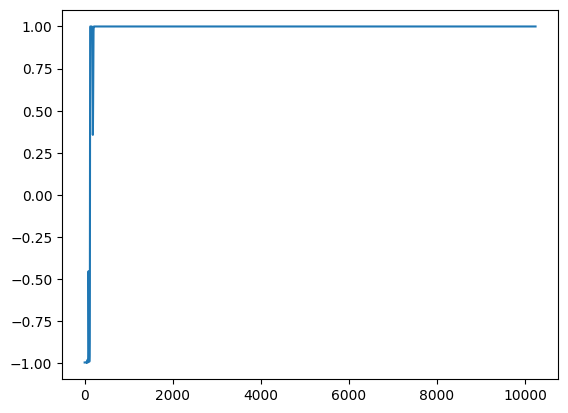

In [22]:

root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")

# c = C(440, nombre="Const", tk=tk, show=True)
# c.doShow()
amp = Sine(C(30, show=True), 
           min=C(0), 
           max=C(1, show=True), 
           show=True)

phase=Sine(C(880, show=True), 
           max=C(1, show=True),
           min=C(0, show=True),
           show=True 
           ) 

s = Sine(
    C(1), 
    amp=amp,
    phase=phase,
    # nombre="Seno", 
    show=True
    )

s1 = Sine(
    C(440), 
    amp=deepcopy(amp),
    phase=deepcopy(phase),
    # nombre="Seno", 
    show=True
    )

s2 = Sine(
    C(440), 
    amp=deepcopy(amp),
    phase=deepcopy(phase),
    # nombre="Seno", 
    show=True
    )

# freq = Sine(C(4), 
#             max=C(440, show=True), 
#             min=C(220, show=True),
#             show=True) 

# s1 = Rep(freq, XP(valor=freq, exp=C(4)) * C(2) - C(1))
# s.doShow(tk)

freq = Sine(C(5000) / X(avoid0=True), 
            max=C(440, show=True), 
            min=C(220, show=True),
            show=True)

s1 = Rep(freq, XP(valor=freq, exp=C(4)) * C(2) - C(1), show=True)

tk.pack(side=LEFT)

a = C(1, show=True, nombre="general")
# a.doShow(tk)

# synt = Synt(C(1), s, amp=a, show=True, nombre="Synt")
synt = HarmSynt(C(1), [C(1/12, show=True), C(1*4/12, show=True), C(.5*8/12, show=True)], [s1, deepcopy(s1), deepcopy(s1)], show=True, fmix=tanh, amp=a)
env = EnvInstrumento(.2, .1, .7, .2, show=True)

inst = Instrumento(synt, env) # cutre
inst.doShow(tk)
# root.pack(side=TOP)
# input = Mixer([inst], tanh)
input = inst
# input=Echo(inst, 0.5, 0.1)
root.mainloop()
input = None

showOsc(synt, 10, True)


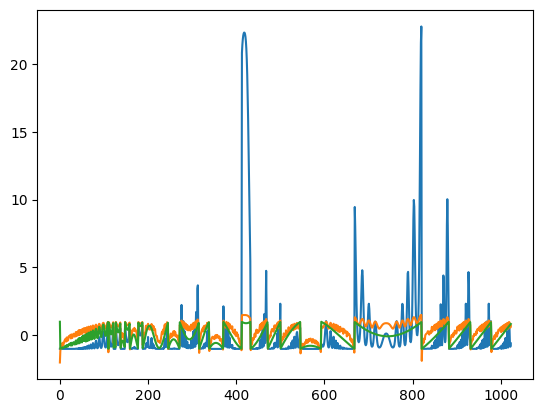

In [21]:

# freq = C(440)

freq = Sine(C(20000) / X(avoid0=True), 
            max=C(440, show=True), 
            min=C(220, show=True),
            show=True)


s1 = Rep(freq, XP(valor=freq, exp=C(4)) * C(2) - C(1))
s2 = Rep(freq, XP(valor=freq, exp=C(1/4)) * C(3) - C(2))
# s2 = Rep(C(440), XP(valor=C(440), pow=C(2)) * C(2) - C(1), phase=Sine(C(440)))
s3 = Sawtooth(freq, phase=C(np.pi/2))
showOsc(s1, 1, True)
showOsc(s2, 1, True)
showOsc(s3, 1, True)
input = s1

In [7]:
input = None

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


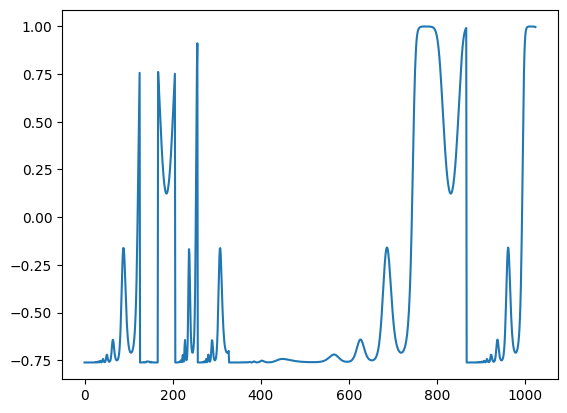

In [20]:
freq = Sine(C(5000) / X(avoid0=True), 
            max=C(440, show=True), 
            min=C(220, show=True),
            show=True)


s1 = Rep(freq, XP(valor=freq, exp=C(4)) * C(2) - C(1))
s = Mixer([s1], tanh)
input = s
showOsc(s, 1, chunks=True)

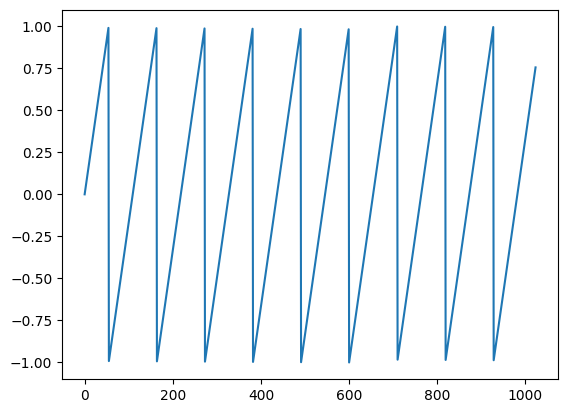

In [11]:
s = Sawtooth(C(440), amp=C(1))
input = s
showOsc(s, 1, chunks=True)

funcion lineal f(x)

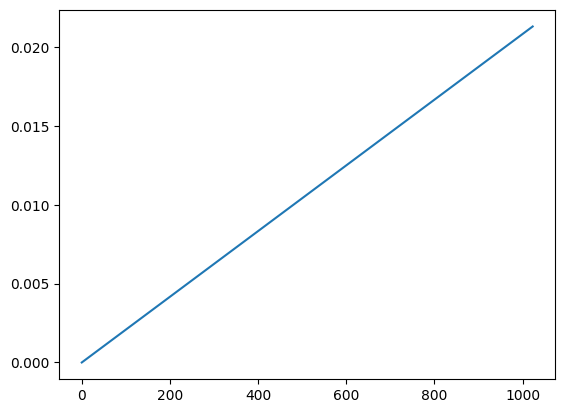

In [6]:
showOsc(XP(C(1)), 1, True)

Uso del sampler y el sampler cíclico

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


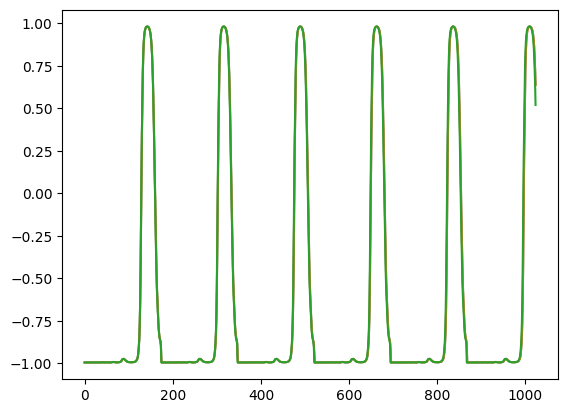

In [6]:
input = None
a = C(1, show=True, nombre="general")

root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")

freq = Sine(C(5000) / X(avoid0=True), 
            max=C(440, show=True), 
            min=C(220, show=True),
            show=True)

s1 = Rep(freq, XP(valor=freq, exp=C(4)) * C(2) - C(1), show=True)
# sol
synt = HarmSynt(C(3322, show=True, to=5000, step=1), [C(1/12, show=True), C(1*4/12, show=True), C(.5*8/12, show=True)], [s1, deepcopy(s1), deepcopy(s1)], show=True, fmix=tanh, amp=a)
# input = synt
# synt.doShow(tk)
# tk.pack()
# root.mainloop()
# showOsc(synt, CHUNK)

onda = []
for i in range(0, int(209*2)):
    onda = np.concatenate((onda, synt.next()))
# plt.plot(onda[:CHUNK])
synt = HarmSynt(C(3322, show=True, to=5000, step=1), [C(1/12, show=True), C(1*4/12, show=True), C(.5*8/12, show=True)], [s1, deepcopy(s1), deepcopy(s1)], show=True, fmix=tanh, amp=a)
rsamp = RSampler(C(3322), onda, og_freq=C(3322))
samp = Sampler(C(3322), onda, C(3322))
showOsc(rsamp, 1, True)
showOsc(samp, 1, True)
showOsc(synt, 1, True)
input = rsamp


In [25]:
input = None

# MIAU
    necesario usar python 3.12 o inferior (por librosa)

ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


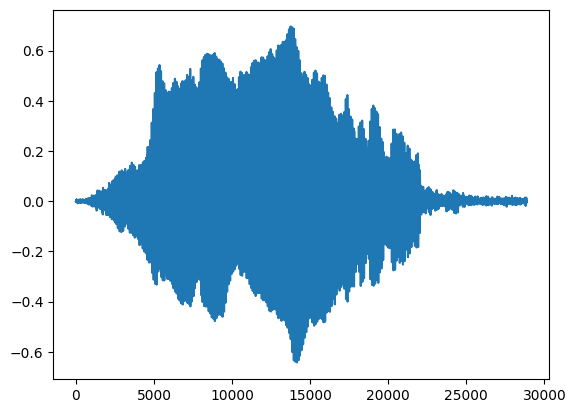

In [6]:
data, sr = librosa.load("miau.wav", sr=SRATE)
data = data[2000:]
plt.plot(data[:SRATE])
# miau
s = Sampler(C(880), data)
input = s

In [7]:
s = Sampler(C(880), data, C(4000))
input = s

In [8]:
# data = Sine(C(440)).next()
s = Sampler(C(440), data, og_freq=C(880), samedur=False)
s2 = Sampler(C(440), data, og_freq=C(880), samedur=True)

# s = Sine(C(1))
# gato en burbuja
# synt = Synt(C(1), s, amp=Sine(C(30, show=True), min=C(0, show=True), max=C(1, show=True), show=True), show=True)

#coro de gatos (suena un poco raro)
# synt = HarmSynt(C(1), [C(1), C(3/2), C(9/8)], [s2])

# gato
synt = Synt(C(1), s, amp=C(1, show=True), show=True)


env = EnvInstrumento(.0, 1, 1, .5, show=True)
inst = Instrumento(synt, env) # cutre
root = Tk()
tk = LabelFrame(root, text="Prueba", bg="#808090")


inst.doShow(tk)
input = inst
tk.pack(side=LEFT)
root.mainloop()
input=None
# inst.noteOn(48)

# plt.plot(np.concatenate((data, data, data, data, data)))
# showOsc(inst, 5, True)


ALSA lib pcm.c:8772:(snd_pcm_recover) underrun occurred


noteOn 48 (523.2511306011972Hz)
noteOff 48 (523.2511306011972Hz)
noteOn 48 (523.2511306011972Hz)
noteOff 48 (523.2511306011972Hz)
noteOn 48 (523.2511306011972Hz)
noteOff 48 (523.2511306011972Hz)
noteOn 52 (659.2551138257398Hz)
noteOff 52 (659.2551138257398Hz)
noteOn 55 (783.9908719634985Hz)
noteOff 55 (783.9908719634985Hz)
off
off
off
noteOn 59 (987.7666025122483Hz)
noteOff 59 (987.7666025122483Hz)
off
noteOn 48 (523.2511306011972Hz)
noteOff 48 (523.2511306011972Hz)
noteOn 50 (587.3295358348151Hz)
noteOff 50 (587.3295358348151Hz)
noteOn 52 (659.2551138257398Hz)
noteOff 52 (659.2551138257398Hz)
noteOn 55 (783.9908719634985Hz)
off
noteOff 55 (783.9908719634985Hz)
off
off
noteOn 59 (987.7666025122483Hz)
noteOff 59 (987.7666025122483Hz)
off
noteOn 48 (523.2511306011972Hz)
off
noteOff 48 (523.2511306011972Hz)
noteOn 50 (587.3295358348151Hz)
noteOff 50 (587.3295358348151Hz)
noteOn 52 (659.2551138257398Hz)
noteOff 52 (659.2551138257398Hz)
noteOn 53 (698.4564628660078Hz)
off
noteOff 53 (698.45

In [14]:
input = None
def callback(outdata, frames, time, status):    
    if status: print(status)    
    #print(inputs)
    s = np.sum([i.next() for i in inputs],axis=0)
    s = np.float32(s)
    outdata[:] = s.reshape(-1, 1)

# os.system('xset r off')
tk = Tk()

inst0 = Instrumento(Synt(C(1), Sine(C(1)), amp=C(1, show=True)), deepcopy(env))

seq = MidiSequencerTk(tk,[inst, inst0])
#print(seq.seq)
inputs = [inst, inst0]

stream = sd.OutputStream(samplerate=SRATE, channels=1, blocksize=CHUNK, callback=callback)
stream.start()

tk.mainloop()

stream.close()

[(0, 'noteOn', 62, 0), (0.24999999999999997, 'noteOff', 62, 0), (0.3, 'noteOn', 62, 0), (0.44687499999999997, 'noteOff', 62, 0), (0.44999999999999996, 'noteOn', 62, 0), (0.7, 'noteOff', 62, 0), (0.75, 'noteOn', 62, 0), (0.896875, 'noteOff', 62, 0), (0.9, 'noteOn', 62, 0), (1.15, 'noteOff', 62, 0), (1.2, 'noteOn', 62, 0), (1.3468749999999998, 'noteOff', 62, 0), (1.3499999999999999, 'noteOn', 62, 0), (1.4968749999999997, 'noteOff', 62, 0), (1.4999999999999998, 'noteOn', 62, 0), (1.6468749999999996, 'noteOff', 62, 0), (1.6499999999999997, 'noteOn', 62, 0), (1.7968749999999996, 'noteOff', 62, 0), (1.7999999999999996, 'noteOn', 62, 0), (2.0499999999999994, 'noteOff', 62, 0), (2.099999999999999, 'noteOn', 62, 0), (2.2468749999999993, 'noteOff', 62, 0), (2.249999999999999, 'noteOn', 62, 0), (2.499999999999999, 'noteOff', 62, 0), (2.549999999999999, 'noteOn', 62, 0), (2.696874999999999, 'noteOff', 62, 0), (2.699999999999999, 'noteOn', 62, 0), (2.949999999999999, 'noteOff', 62, 0), (2.999999999